# SARA MALALAN

### Homework 1

In [1]:
import random
import math

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import torch
from torch import nn, optim
from IPython import display

from utils.visual import plot_data, plot_model, set_default
set_default()

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device: {}'.format(device))

Device: cpu


In [3]:
torch.manual_seed(41)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

In [4]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    inner_var = torch.linspace(
        # When t = 0
        (2 * np.pi / C) * (c),
        # When t = 1
        (2 * np.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            np.sin(inner_var[index]), np.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", X.size())
print("y:", y.size())

Shapes:
X: torch.Size([3000, 2])
y: torch.Size([3000])


In [5]:
y

tensor([0, 0, 0,  ..., 2, 2, 2])

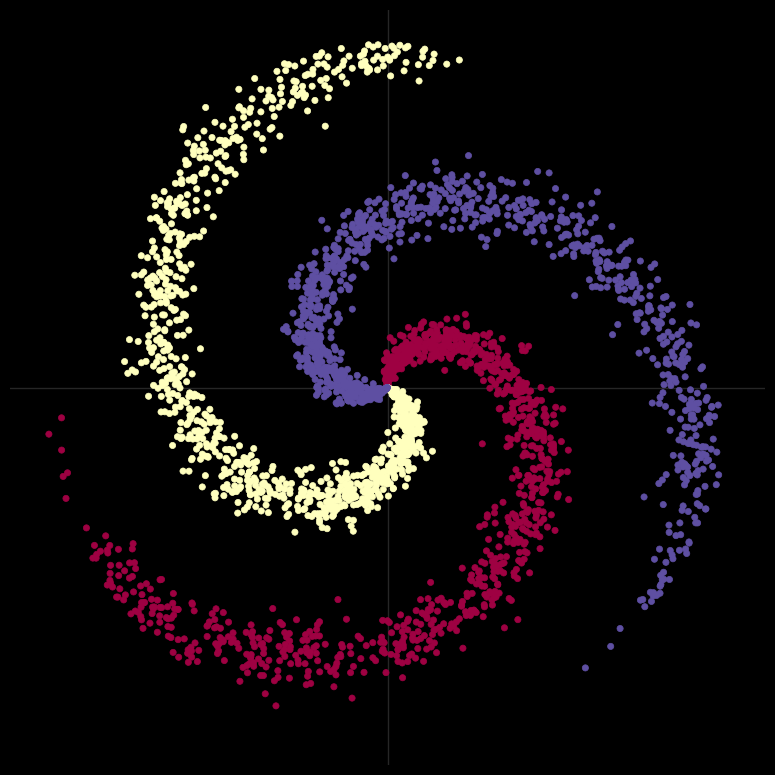

In [6]:
# visualise the data
plot_data(X, y)

In [23]:
lr = 1e-2
lambdaL2 = 1e-5
epochs = 1000

model = nn.Sequential(
            nn.Linear(D, H),
            nn.Tanh(),
            nn.Linear(H, C))

model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=lambdaL2)

for e in range(epochs):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    print("[EPOCH]: {}, [LOSS]: {}".format(e, loss.item()))
    display.clear_output(wait=True)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.7821996808052063


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Tanh()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


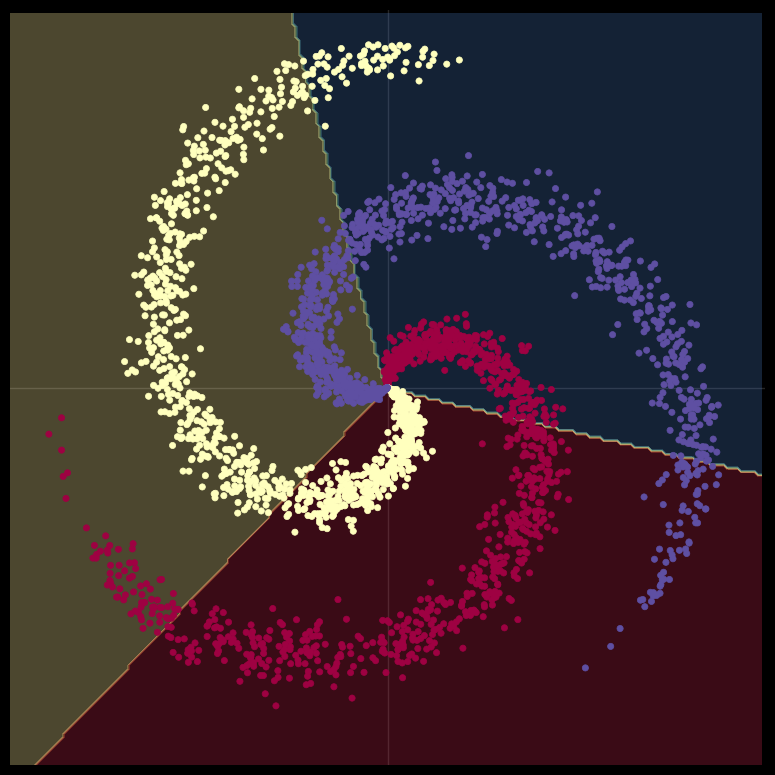

In [24]:
# Plot trained model
set_default()
print(model)
plot_model(X, y, model)

In [25]:
lr = 1e-2
lambdaL2 = 1e-5
epochs = 1000

model = nn.Sequential(
            nn.Linear(D, H),
            nn.Tanh(),
            nn.Linear(H, C))

model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=lambdaL2)

for e in range(epochs):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    print("[EPOCH]: {}, [LOSS]: {}".format(e, loss.item()))
    display.clear_output(wait=True)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.018240122124552727


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Tanh()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


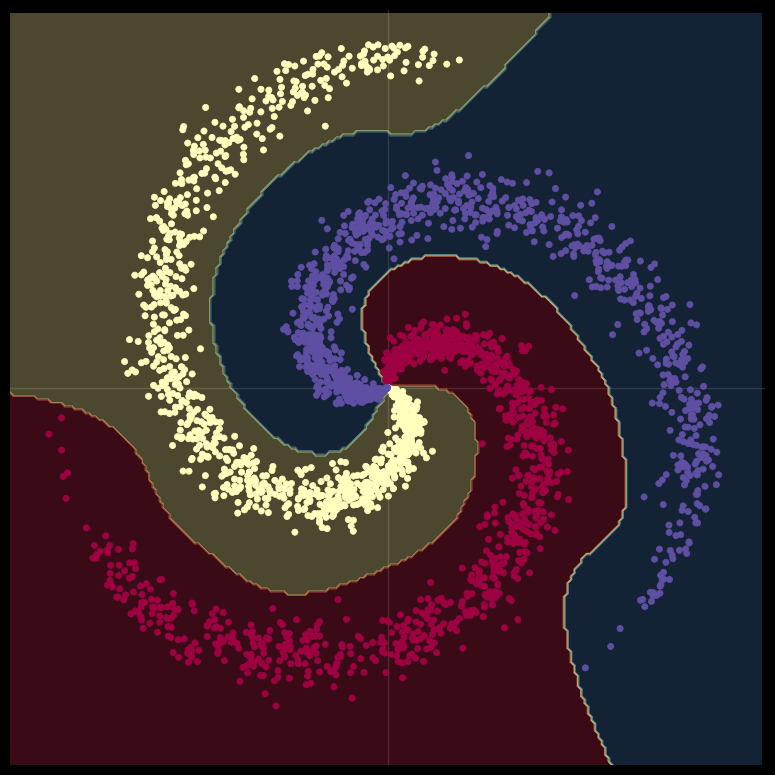

In [26]:
# Plot trained model
set_default()
print(model)
plot_model(X, y, model)

The classification reaches 100% of accuracy using a Tanh non linear activation function, 0.01 as learning rate and Adam optimizer.